In [141]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import os
import getpass
pd.set_option('display.max_columns', None)

desired_username = 'felixlavallee-morissette'
current_username = getpass.getuser()

if current_username == desired_username:
    directory_path = '/Users/felixlavallee-morissette/Downloads/'
    os.chdir(directory_path)
    print(f"Directory changed to {directory_path}")
else:
    print("This is not Felix's computer. Directory change not executed.")

Directory changed to /Users/felixlavallee-morissette/Downloads/


In [142]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# Fig 1

In [143]:
df = pd.read_excel("Data_for_project(1).xlsx") 


In [144]:
df.columns = df.iloc[2]
df = df.drop(df.index[:3])
df = df.drop(df.index[:2])
df = df.rename(columns={df.columns[0]: 'Timestamp'})

In [145]:
au = df[['Timestamp', 'C1275Y Index','AUD Curncy']]


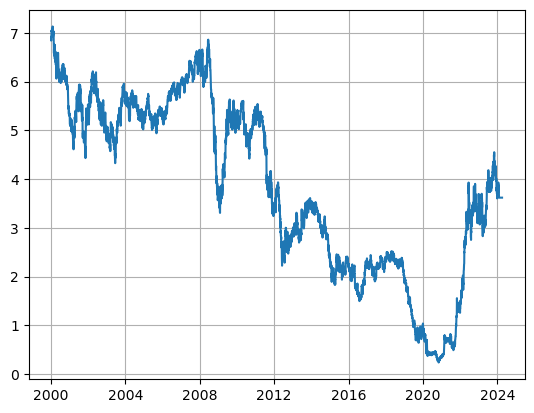

In [146]:
plt.plot(au['Timestamp'][1:], au['C1275Y Index'].dropna())
plt.grid(True)

## Combine all G10 countries and USD

In [147]:
sheets_dict = pd.read_excel("Data_for_project(1).xlsx", sheet_name=None)

# Access each DataFrame using the sheet name as key
df_cad = sheets_dict['CAD']
df_cad.columns = df_cad.iloc[2]
df_cad = df_cad.drop(df_cad.index[:3])
df_cad = df_cad.drop(df_cad.index[:2])
df_cad = df_cad.rename(columns={df_cad.columns[0]: 'Timestamp'})

df_chf = sheets_dict['CHF']
df_chf.columns = df_chf.iloc[2]
df_chf = df_chf.drop(df_chf.index[:3])
df_chf = df_chf.drop(df_chf.index[:2])
df_chf = df_chf.rename(columns={df_chf.columns[0]: 'Timestamp'})

df_jpy = sheets_dict['JPY']
df_jpy.columns = df_jpy.iloc[2]
df_jpy = df_jpy.drop(df_jpy.index[:3])
df_jpy = df_jpy.drop(df_jpy.index[:2])
df_jpy = df_jpy.rename(columns={df_jpy.columns[0]: 'Timestamp'})

df_eur = sheets_dict['EUR']
df_eur.columns = df_eur.iloc[2]
df_eur = df_eur.drop(df_eur.index[:3])
df_eur = df_eur.drop(df_eur.index[:2])
df_eur = df_eur.rename(columns={df_eur.columns[0]: 'Timestamp'})

df_gbp = sheets_dict['GBP']
df_gbp.columns = df_gbp.iloc[2]
df_gbp = df_gbp.drop(df_gbp.index[:3])
df_gbp = df_gbp.drop(df_gbp.index[:2])
df_gbp = df_gbp.rename(columns={df_gbp.columns[0]: 'Timestamp'})

In [148]:

cad = df_cad[['Timestamp', 'C1015Y Index','CAD Curncy']]


In [149]:

chf = df_chf[['Timestamp', 'C2565Y Index','CHF Curncy']]

In [150]:

jpy = df_jpy[['Timestamp', 'C1055Y Index','JPY Curncy']]

In [151]:

eur = df_eur[['Timestamp', 'C9105Y Index','EUR Curncy']]

In [152]:

gbp = df_gbp[['Timestamp', 'C1105Y Index','GBP Curncy']]

In [153]:
# Access each DataFrame using the sheet name as key
df_usd = sheets_dict['USD']

# Process USD DataFrame
df_usd.columns = df_usd.iloc[2]
df_usd = df_usd.drop(df_usd.index[:3])
df_usd = df_usd.drop(df_usd.index[:2])
df_usd = df_usd.rename(columns={df_usd.columns[0]: 'Timestamp'})
usd = df_usd[['Timestamp', 'C0825Y Index']]  # Replace 'CXXXXY Index' with actual column name for USD

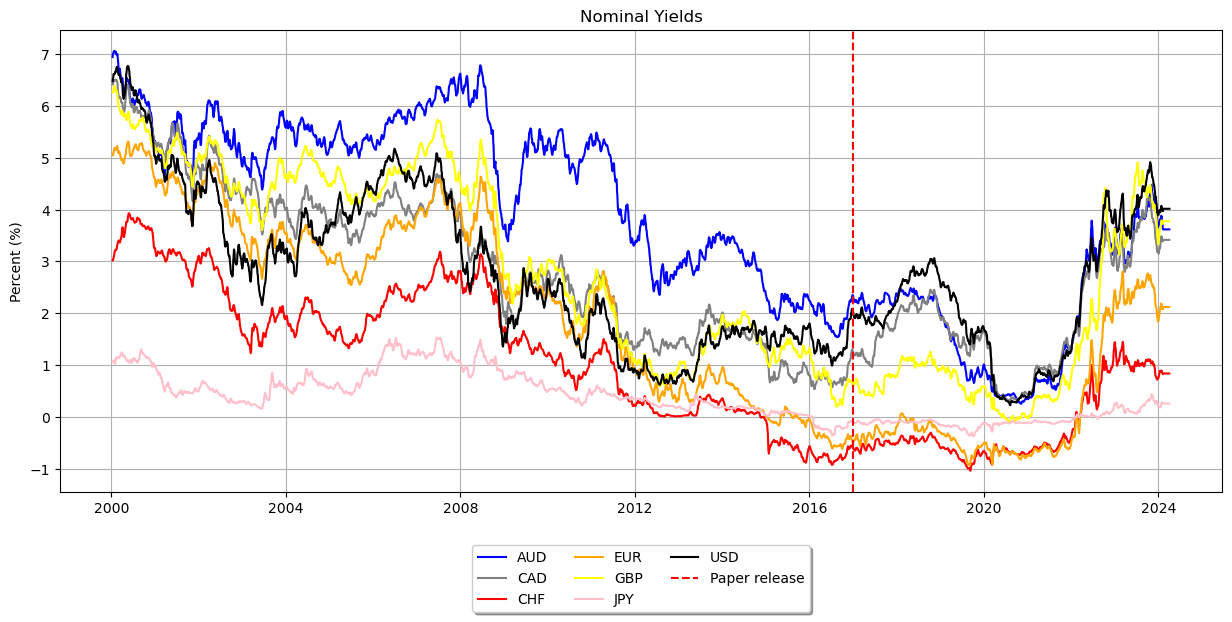

In [154]:
# Plotting
plt.figure(figsize=(15, 6))
plt.plot(au['Timestamp'][7:], pd.Series(au['C1275Y Index']).rolling(window=7).mean().dropna(), label='AUD',color = 'blue')
plt.plot(cad['Timestamp'][7:], pd.Series(cad['C1015Y Index']).rolling(window=7).mean().dropna(), label='CAD',color = 'grey')
plt.plot(chf['Timestamp'][7:], pd.Series(chf['C2565Y Index']).rolling(window=7).mean().dropna(), label='CHF',color = 'red')
plt.plot(eur['Timestamp'][7:], pd.Series(eur['C9105Y Index']).rolling(window=7).mean().dropna(), label='EUR',color = 'orange')
plt.plot(gbp['Timestamp'][7:], pd.Series(gbp['C1105Y Index']).rolling(window=7).mean().dropna(), label='GBP',color = 'yellow')
plt.plot(jpy['Timestamp'][7:], pd.Series(jpy['C1055Y Index']).rolling(window=7).mean().dropna(), label='JPY',color = 'pink')
plt.plot(usd['Timestamp'][7:], pd.Series(usd['C0825Y Index']).rolling(window=7).mean().dropna(), label='USD',color = 'black') 
plt.axvline(x=pd.Timestamp('2017-01-01'), color='r', linestyle='--', label='Paper release')
plt.ylabel('Percent (%)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=3)
plt.title('Nominal Yields')
plt.grid(True)
plt.show()

## Getting the variable: forward premium

In [170]:
usd_irs = df_usd['USSW5 Curncy'] 
usd_irs = usd_irs.iloc[:-1]
usd_irs_gfc = usd_irs.iloc[3106:]
ts = df_usd['Timestamp'][3107:]

In [157]:
aud_irs = df['ADSWAP5 Curncy']
aud_bs = df['ADBS5 Curncy'] / 100  # Divide by 100
aud_irs_gfc = aud_irs.iloc[3106:]
aud_bs = aud_bs.dropna()
forward_premium_au = aud_irs_gfc + aud_bs - usd_irs_gfc
au_gfc = au['C1275Y Index'][3106:]

In [161]:
cad_irs = df_cad['CDSW5 Curncy']
cad_bs = df_cad['CDBS5 Curncy'] / 100  # Divide by 100
cad_irs_gfc = cad_irs.iloc[3106:]
cad_bs = cad_bs.dropna()
forward_premium_cad = cad_irs_gfc + cad_bs - usd_irs_gfc
cad_gfc = cad['C1015Y Index'][3106:]


In [171]:
chf_irs = df_chf['SFSW5 Curncy']
chf_bs = df_chf['SFBS5 Curncy'] / 100  # Divide by 100
chf_irs_gfc = chf_irs.iloc[3106:]
chf_bs = chf_bs.dropna()
forward_premium_chf = chf_irs_gfc + chf_bs - usd_irs_gfc
chf_gfc = chf['C2565Y Index'][3106:]

In [165]:
eur_irs = df_eur['EUSW5V3 Curncy']
eur_bs = df_eur['EUBS5 Curncy'] / 100  # Divide by 100
eur_irs_gfc = eur_irs.iloc[3106:]
eur_bs = eur_bs.dropna()
forward_premium_eur = eur_irs_gfc + eur_bs - usd_irs_gfc
eur_gfc = eur['C9105Y Index'][3106:]

In [166]:
gbp_irs = df_gbp['BPSW5 Curncy']
gbp_bs = df_gbp['BPBS5 Curncy'] / 100  # Divide by 100
gbp_irs_gfc = gbp_irs.iloc[3106:]
gbp_bs = gbp_bs.dropna()
forward_premium_gbp = gbp_irs_gfc + gbp_bs - usd_irs_gfc
gbp_gfc = gbp['C1105Y Index'][3106:]

In [167]:
jpy_irs = df_jpy['JYSW5 Curncy']
jpy_bs = df_jpy['JYBS5 Curncy'] / 100  # Divide by 100
jpy_irs_gfc = jpy_irs.iloc[3106:]
jpy_bs = jpy_bs.dropna()
forward_premium_jpy = jpy_irs_gfc + jpy_bs - usd_irs_gfc
jpy_gfc = jpy['C1055Y Index'][3106:]

In [177]:
len(ts)

3221

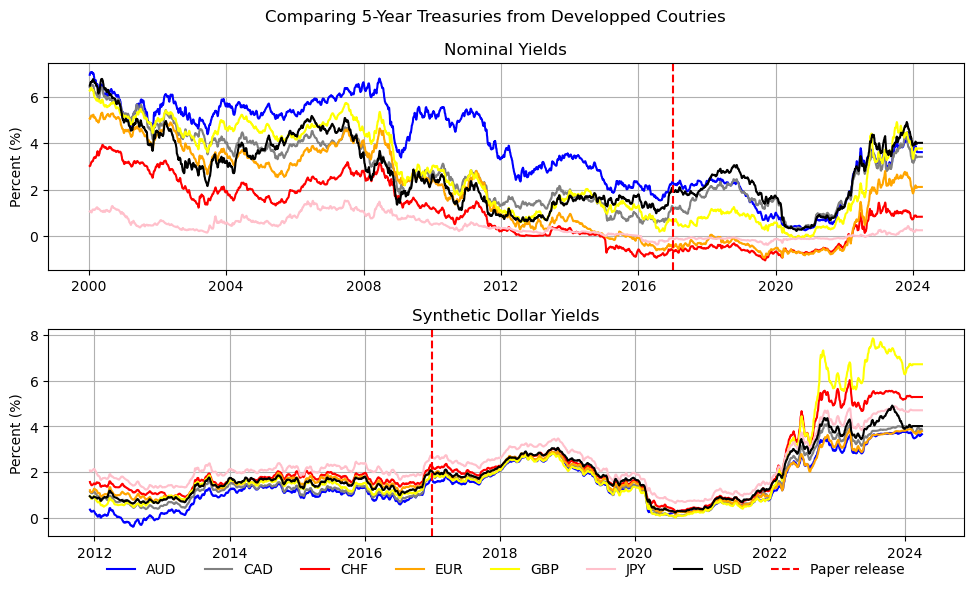

In [195]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1,figsize=(10, 6))

# Plotting nominal

ax1.plot(au['Timestamp'][7:], pd.Series(au['C1275Y Index']).rolling(window=7).mean().dropna(), label='AUD',color = 'blue')
ax1.plot(cad['Timestamp'][7:], pd.Series(cad['C1015Y Index']).rolling(window=7).mean().dropna(), label='CAD',color = 'grey')
ax1.plot(chf['Timestamp'][7:], pd.Series(chf['C2565Y Index']).rolling(window=7).mean().dropna(), label='CHF',color = 'red')
ax1.plot(eur['Timestamp'][7:], pd.Series(eur['C9105Y Index']).rolling(window=7).mean().dropna(), label='EUR',color = 'orange')
ax1.plot(gbp['Timestamp'][7:], pd.Series(gbp['C1105Y Index']).rolling(window=7).mean().dropna(), label='GBP',color = 'yellow')
ax1.plot(jpy['Timestamp'][7:], pd.Series(jpy['C1055Y Index']).rolling(window=7).mean().dropna(), label='JPY',color = 'pink')
ax1.plot(usd['Timestamp'][7:], pd.Series(usd['C0825Y Index']).rolling(window=7).mean().dropna(), label='USD',color = 'black') 
ax1.axvline(x=pd.Timestamp('2017-01-01'), color='r', linestyle='--', label='Paper release')
ax1.set_ylabel('Percent (%)')
ax1.set_title('Nominal Yields')
ax1.grid(True)

# Plotting synthetic usd

ax2.plot(ts[6:], pd.Series(au['C1275Y Index']-forward_premium_au).rolling(window=7).mean().dropna(), label='AUD',color = 'blue')
ax2.plot(ts[6:], pd.Series(cad['C1015Y Index']-forward_premium_cad).rolling(window=7).mean().dropna(), label='CAD', color = 'grey')
ax2.plot(ts[6:], pd.Series(chf['C2565Y Index']-forward_premium_chf).rolling(window=7).mean().dropna(), label='CHF',color = 'red')
ax2.plot(ts[6:], pd.Series(eur['C9105Y Index']-forward_premium_eur).rolling(window=7).mean().dropna(), label='EUR',color = 'orange')
ax2.plot(ts[6:], pd.Series(gbp['C1105Y Index']-forward_premium_gbp).rolling(window=7).mean().dropna(), label='GBP',color = 'yellow')
ax2.plot(ts[6:], pd.Series(jpy['C1055Y Index']-forward_premium_jpy).rolling(window=7).mean().dropna(), label='JPY',color = 'pink')
ax2.plot(ts[5:], pd.Series(usd['C0825Y Index'][3106:]).rolling(window=7).mean().dropna(), label='USD',color = 'black') 
ax2.axvline(x=pd.Timestamp('2017-01-01'), color='r', linestyle='--', label='Paper release')
ax2.set_ylabel('Percent (%)')
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), frameon=False, borderaxespad=0, ncol=8)
ax2.set_title('Synthetic Dollar Yields')
ax2.grid(True)

# Add figure title
plt.suptitle('Comparing 5-Year Treasuries from Developped Coutries')  

# Adjust layout to prevent overlapping
plt.tight_layout()

plt.show()

## Plot synthetic dollar yields

### Get forward premium variables for other countries

In [ ]:
cad_bs_gfc = cad_bs[2542:]
cad_bs_gfc

2547     0.145
2548     0.145
2549     0.145
2550     0.145
2551     0.145
         ...  
6327   -0.1025
6328    -0.115
6329    -0.105
6330   -0.1075
6331    -0.105
Name: CDBS5 Curncy, Length: 3785, dtype: object

In [ ]:
cad_irs_gfc = cad_irs[2542:]
cad_irs_gfc

2547    2.6345
2548     2.578
2549     2.551
2550     2.554
2551     2.624
         ...  
6327    3.8295
6328     3.859
6329     3.859
6330    3.9625
6331    3.9753
Name: CDSW5 Curncy, Length: 3785, dtype: object

In [ ]:
usd_irs = usd_irs.dropna()
usd_irs

2547    2.6485
2548    2.5335
2549      2.56
2550    2.5805
2551     2.619
         ...  
6327     4.219
6328     4.219
6329     4.219
6330     4.219
6331     4.219
Name: USSW5 Curncy, Length: 3785, dtype: object

In [ ]:
def get_forward_premium(irs, bs, usirs=usd_irs):
    return irs+bs-usirs


forward_premium_cad = get_forward_premium(cad_irs_gfc, cad_bs_gfc)

In [ ]:
ts_cad = au['Timestamp'][2542:]
ts_cad

2547    2009-09-30 00:00:00
2548    2009-10-01 00:00:00
2549    2009-10-02 00:00:00
2550    2009-10-05 00:00:00
2551    2009-10-06 00:00:00
               ...         
6327    2024-03-27 00:00:00
6328    2024-03-28 00:00:00
6329    2024-03-29 00:00:00
6330    2024-04-01 00:00:00
6331    2024-04-02 00:00:00
Name: Timestamp, Length: 3785, dtype: object

In [ ]:
cad_gfc = cad['C1015Y Index'][2542:]

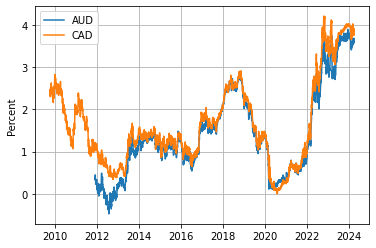

In [ ]:
plt.plot(ts, au_gfc-forward_premium_au, label='AUD')
plt.plot(ts_cad, cad_gfc-forward_premium_cad, label='CAD')
plt.ylabel('Percent')
plt.legend()
plt.grid(True)

## Forward premium: CHF

In [ ]:
chf_irs = df_chf['SFSW5V3 Curncy']
chf_bs = df_chf['SFBS5 Curncy'] / 100  # Divide by 100

In [ ]:
chf_irs.dropna()

2548     1.533
2549     1.535
2550     1.535
2551     1.553
2552      1.54
         ...  
6327   -0.2325
6328   -0.2325
6329   -0.2325
6330   -0.2325
6331   -0.2325
Name: SFSW5V3 Curncy, Length: 3784, dtype: object

In [ ]:
chf_bs.dropna()

2962   -0.240445
2963   -0.241931
2964       -0.23
2965       -0.23
2966       -0.23
          ...   
6327     -0.0725
6328     -0.0725
6329     -0.0725
6330     -0.0725
6331     -0.0725
Name: SFBS5 Curncy, Length: 3370, dtype: object

In [ ]:
chf_bs_gfc = chf_bs[2957:]
chf_bs_gfc

2962   -0.240445
2963   -0.241931
2964       -0.23
2965       -0.23
2966       -0.23
          ...   
6327     -0.0725
6328     -0.0725
6329     -0.0725
6330     -0.0725
6331     -0.0725
Name: SFBS5 Curncy, Length: 3370, dtype: object

In [ ]:
chf_irs_gfc = chf_irs[2957:]
chf_irs_gfc

2962    1.5665
2963     1.498
2964     1.485
2965     1.445
2966     1.418
         ...  
6327   -0.2325
6328   -0.2325
6329   -0.2325
6330   -0.2325
6331   -0.2325
Name: SFSW5V3 Curncy, Length: 3370, dtype: object

In [ ]:
ts_chf = au['Timestamp'][2957:]
ts_chf

2962    2011-05-04 00:00:00
2963    2011-05-05 00:00:00
2964    2011-05-06 00:00:00
2965    2011-05-09 00:00:00
2966    2011-05-10 00:00:00
               ...         
6327    2024-03-27 00:00:00
6328    2024-03-28 00:00:00
6329    2024-03-29 00:00:00
6330    2024-04-01 00:00:00
6331    2024-04-02 00:00:00
Name: Timestamp, Length: 3370, dtype: object

In [ ]:
usd_chf = usd_irs[415:]
usd_chf

2962      2.12
2963    2.0676
2964     2.054
2965    2.0395
2966     2.108
         ...  
6327     4.219
6328     4.219
6329     4.219
6330     4.219
6331     4.219
Name: USSW5 Curncy, Length: 3370, dtype: object

In [ ]:
forward_premium_chf = get_forward_premium(chf_irs_gfc, chf_bs_gfc, usd_chf)

In [ ]:
chf_gfc = chf['C2565Y Index'][2957:]

In [ ]:
usd['Timestamp'][2537:]

2542    2009-09-23 00:00:00
2543    2009-09-24 00:00:00
2544    2009-09-25 00:00:00
2545    2009-09-28 00:00:00
2546    2009-09-29 00:00:00
               ...         
6328    2024-03-28 00:00:00
6329    2024-03-29 00:00:00
6330    2024-04-01 00:00:00
6331    2024-04-02 00:00:00
6332    2024-04-03 00:00:00
Name: Timestamp, Length: 3791, dtype: object

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(ts, pd.Series(au_gfc-forward_premium_au).rolling(window=7).mean().dropna(), label='AUD')
plt.plot(ts_cad, cad_gfc-forward_premium_cad, label='CAD')
plt.plot(ts_chf, chf_gfc-forward_premium_chf, label='CHF')
plt.plot(usd['Timestamp'][2537:], usd['C0825Y Index'][2537:], label='USD') 
plt.ylabel('Percent')
plt.legend()
plt.grid(True)
plt.savefig('images/fig1b')
pd.Series(au['C1275Y Index']).rolling(window=7).mean().dropna()

NameError: name 'ts' is not defined

<Figure size 1500x600 with 0 Axes>

In [ ]:
synthetic_aud = au_gfc-forward_premium_au
synthetic_cad = cad_gfc-forward_premium_cad
synthetic_chf = chf_gfc-forward_premium_chf

# Fig 3

In [ ]:
def ustp(synthetic, govt_us):
    a = len(synthetic)
    b = len(govt_us)
    
    l = min(a,b)
    synthetic = synthetic.tail(l)
    govt_us = govt_us.tail(l)
    
    return (synthetic - govt_us)*100  

In [ ]:
synthetic_aud

3111    0.3904
3112    0.3299
3113    0.4459
3114    0.3214
3115    0.3486
         ...  
6327    3.6852
6328    3.6852
6329    3.6852
6330    3.6852
6331    3.5982
Length: 3221, dtype: object

In [ ]:
govt_us = usd['C0825Y Index'].drop(usd.index[-1])

In [ ]:
govt_us

5          6.5
6         6.39
7         6.48
8         6.42
9         6.42
         ...  
6327    4.0159
6328    4.0159
6329    4.0159
6330    4.0159
6331    4.0159
Name: C0825Y Index, Length: 6327, dtype: object

In [ ]:
ustp_aud = ustp(synthetic_aud, govt_us)

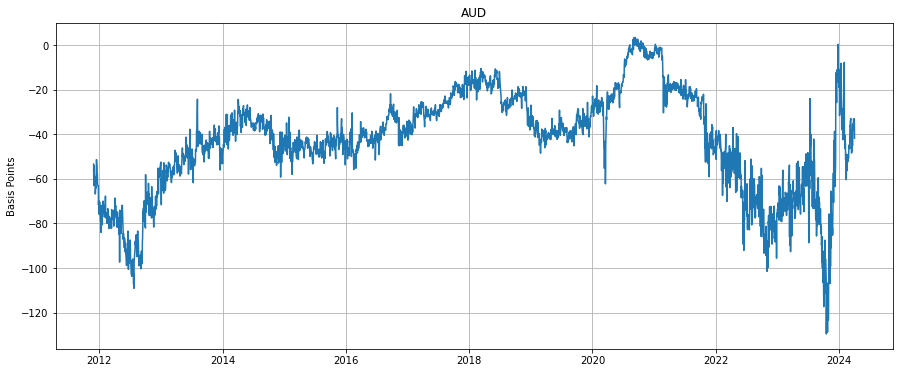

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(ts, ustp_au, label='AUD')
plt.ylabel('Basis Points')
plt.title("AUD")
plt.grid(True)
plt.savefig('images/fig3_aud')

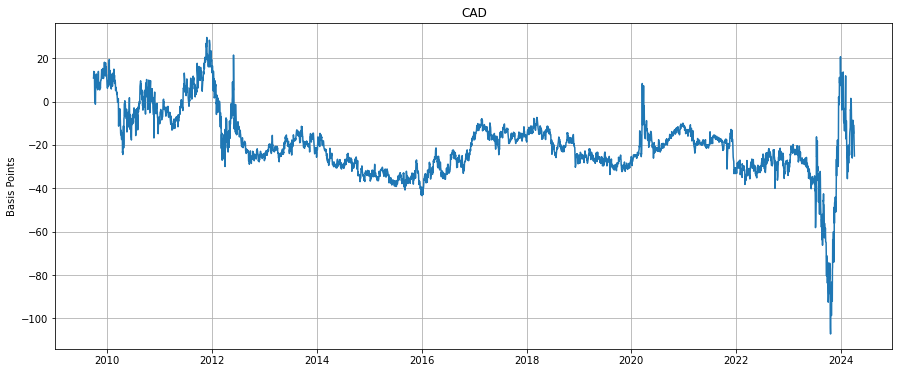

In [ ]:
ustp_cad = ustp(synthetic_cad, govt_us)
plt.figure(figsize=(15, 6))
plt.plot(ts_cad, ustp_cad)
plt.ylabel('Basis Points')
plt.title("CAD")
plt.grid(True)
plt.savefig('images/fig3_cad')

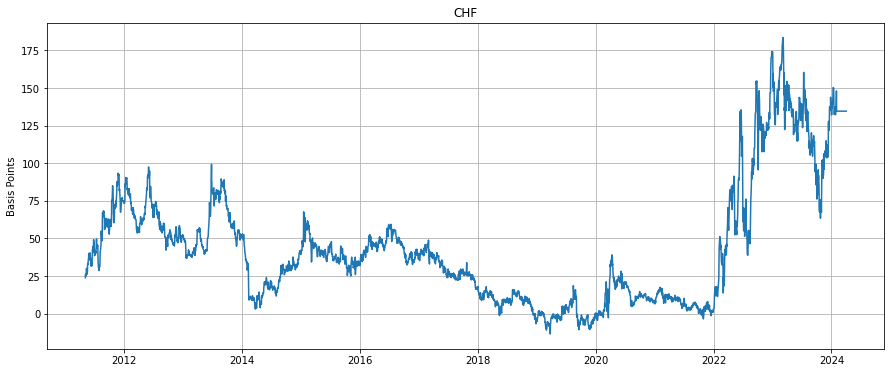

In [ ]:
ustp_chf = ustp(synthetic_chf, govt_us)
plt.figure(figsize=(15, 6))
plt.plot(ts_chf, ustp_chf)
plt.ylabel('Basis Points')
plt.title("CHF")
plt.grid(True)
plt.savefig('images/fig3_chf')

# Fig 2

In [ ]:
ustp_mean = (ustp_chf + ustp_cad + ustp_aud) / 3
ustp_mean = ustp_mean.dropna()

In [ ]:
ustp_mean

3111        21.38
3112    12.706667
3113    15.843333
3114        14.84
3115        12.24
          ...    
6327    30.256667
6328        29.69
6329    29.356667
6330        25.99
6331        22.58
Length: 3221, dtype: object

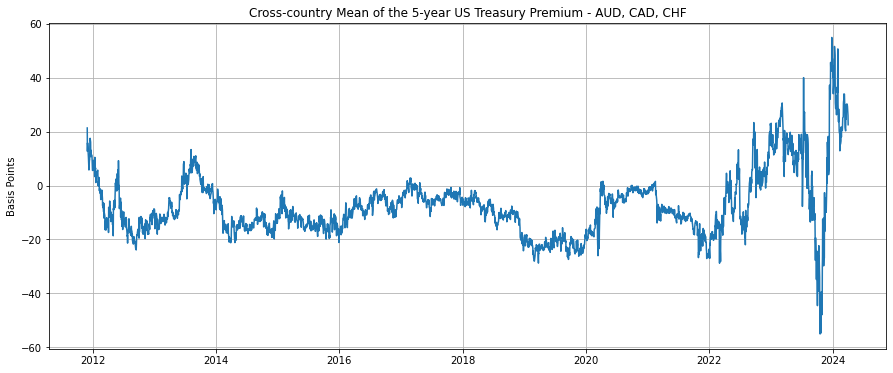

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(ts, ustp_mean)
plt.ylabel('Basis Points')
plt.title("Cross-country Mean of the 5-year US Treasury Premium - AUD, CAD, CHF")
plt.grid(True)
plt.savefig('images/fig2')